## 03 Support

This notebook explains each function in the support module. These functions are required to construct line of sight maps.

In [1]:
# import modules
import convenience as con
import support as sup
import numpy as np

# Point to test data, and create list of total brightness and polarized brightness image pair
tb_base_fits="./test_data/stereo/20121109_000915_B_base.fts"
pb_base_fits="./test_data/stereo/20121109_000915_pB_base.fts"

tb_fits="./test_data/stereo/20121109_030915_B.fts"
pb_fits="./test_data/stereo/20121109_030915_pB.fts"

base_fits_file_list=[tb_base_fits, pb_base_fits]
fits_file_list=[tb_fits, pb_fits]

### Function: build_mask
Builds a circular binary mask for coronagraph images.

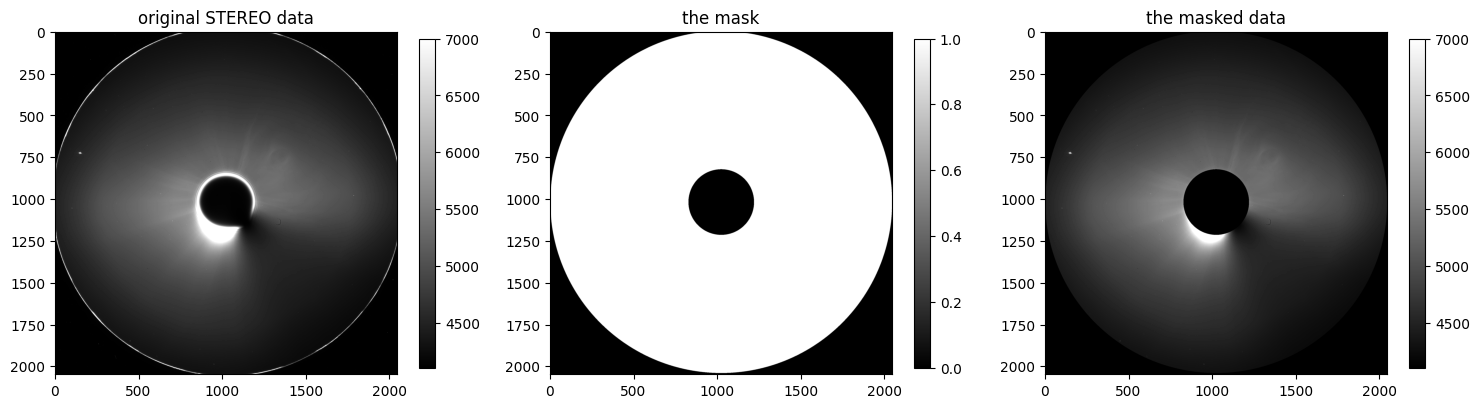

In [2]:
# import stereo data
test_fits_data, test_fits_hdr = con.open_fits(tb_fits)

# display the data
data = np.clip(test_fits_data, np.min(test_fits_data), 7000)

# build mask, this accepts FITS file directly
mask_data=sup.build_mask(tb_fits)

# apply mask
masked_data = mask_data * data
final_data = np.clip(masked_data, np.min(test_fits_data), 7000)

# show the original data, the mask, and the masked data
con.show_3_images(data, mask_data, final_data,  title1="original STEREO data", title2="the mask",title3="the masked data")

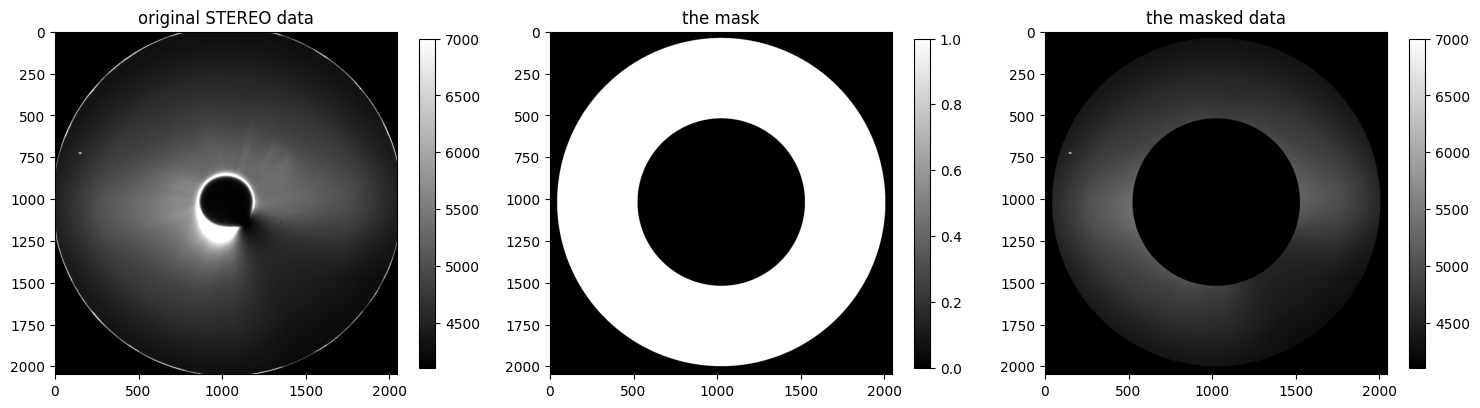

In [3]:
# The build_mask function allows for user defined inner and outer masks, defined in pixels

# import stereo data
test_fits_data, test_fits_hdr = con.open_fits(tb_fits)

# display the data
data = np.clip(test_fits_data, np.min(test_fits_data), 7000)

# build mask 
mask_data = sup.build_mask(tb_fits, inner_radius_pix=500,outer_radius_pix=980)

# apply mask
masked_data = mask_data * data
final_data = np.clip(masked_data, np.min(test_fits_data), 7000)

# show the original data, the mask, and the masked data
con.show_3_images(data, mask_data, final_data,  title1="original STEREO data", title2="the mask",title3="the masked data")

### Function: import_data
Loads, optionally masks it, and optionally base-difference a total-brightness (tB) and polarized-brightness (pB) FITS pair. A file_list is required, and should a List/tuple of exactly two FITS file paths: [tB_path, pB_path]. 

data_type is an optional parameter used to ingest forward data that does not have a full header structure. 

use_mask is a boolean, with default True, and invokes the previously described mask algorithm. subtract_base_image, is used to subtract base images from image of interest, this requires a base_file_list to be defined as a List/tuple of exactly two FITS file paths: [tB_base_path, pB_base_path]. 

bad_pixel_value can be defined to mark bad pixels, the default is -8888. If `None`, no replacement is performed even if `data_type='forward'`. The function returns prepped data in the form of a Total brightness array, a Polarized brightness array, a header associated with the tB image and a pB_header.

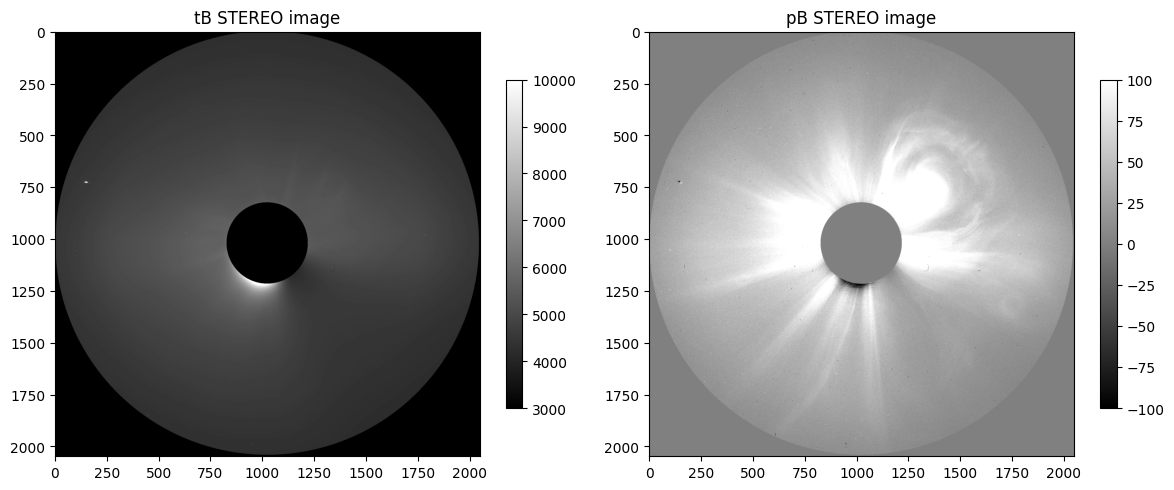

In [21]:
# run import_data
tb_data, pB_data, tb_header, pb_header = sup.import_data(fits_file_list)

clip_tb_data = np.clip(tb_data, 3000, 10000)
clip_pb_data = np.clip(pB_data, -100, 100)

# view tB, pB pair, both have been masked by default
con.show_2_images(clip_tb_data, clip_pb_data,  title1="tB STEREO image", title2="pB STEREO image")

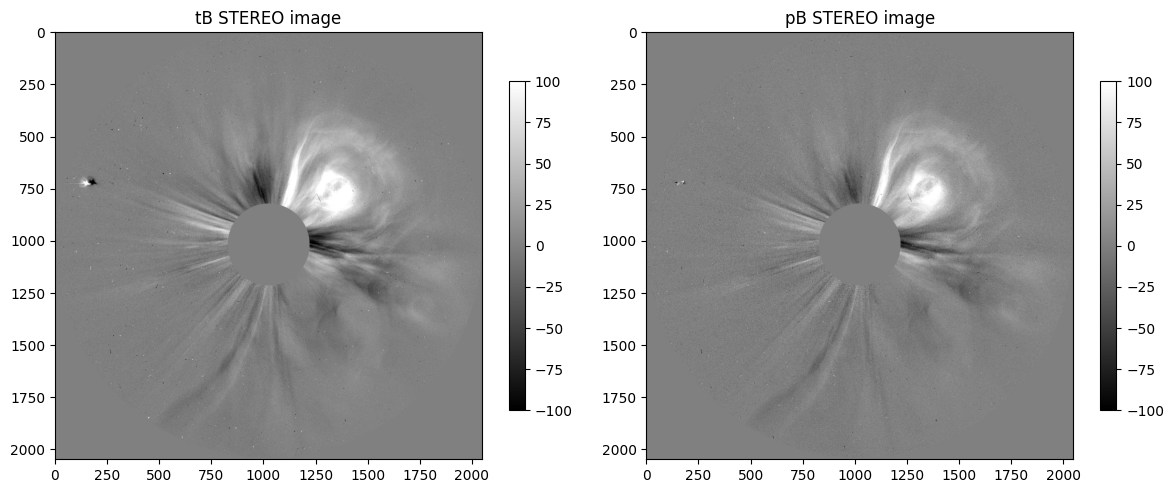

In [11]:
# run import_data with base file list
tb_data, pB_data, tb_header, pb_header = sup.import_data(fits_file_list, subtract_base_image=True, base_file_list=base_fits_file_list)

clip_tb_data = np.clip(tb_data, -100, 100)
clip_pb_data = np.clip(pB_data, -100, 100)

# view tB, pB pair, both have been masked by default
con.show_2_images(clip_tb_data, clip_pb_data,  title1="tB STEREO image", title2="pB STEREO image")

### Function: create_distance_map

Creates a 2D map of image-plane distances from Sun centre for each pixel. This function computes the projected distance from the Sun centre in the image plane (the impact parameter r_pos) for each pixel in the pB image. Distances are returned in kilometres and are suitable for direct use as `dist_image_plane` in `radial_position_ps`.

Geometry is derived either from the FITS WCS (using CDELT/CRPIX/RSUN) or from a simple assumed field-of-view in solar radii.

The function requires a file_list, data_type is an optional inputu used here only for the special case when 'noise_gate_data' s used and computing pixel scales. use_mask is used to mask the data as described above, as is subtract_base_image, which if invoked requires a base_file_list.

The Function returns a spatial_plane_distance 2D array of shape (ny, nx) giving the projected distance from the Sun centre in the image plane for each pixel, in kilometres.

This is required for line of sight calculations

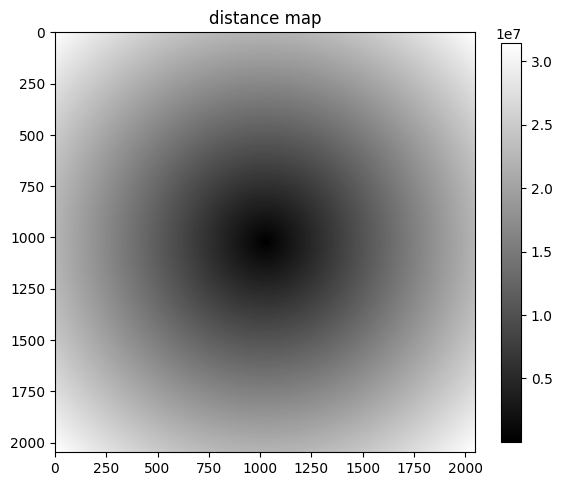

In [5]:
# create a distance map using the above stereo data
distance_map = sup.create_distance_map(fits_file_list)

# view distance map, each pixel has its distance from the sun center
con.show_1_image(distance_map,  title1="distance map")